In [1]:
import torch
import os
import pandas as pd
from torch_geometric.data import InMemoryDataset, Data, download_url, extract_zip
from torch_geometric.utils.convert import to_networkx
import networkx as nx
from tqdm import tqdm
import matplotlib.pyplot as plt

The following is the README of the dataset:

FRANKENSTEIN contains the following comma separated text files:

n: total number of nodes m: total number of edges N: number of graphs

*.node_attrs (n lines) matrix of node attributes, the comma seperated values in the i-th line is the attribute vector of the node with node_id i

*.edges (m lines) sparse (block diagonal) adjacency matrix for all graphs, each line corresponds to (row, col) resp. (node_id, node_id)

*.graph_labels (N lines) class labels for all graphs in the dataset, the value in the i-th line is the class label of the graph with graph_id i

*.graph_idx (n lines) column vector of graph identifiers for all nodes of all graphs, the value in the i-th line is the graph_id of the node with node_id i

### In this section, the breakdown of Process() method from Data Module on PyG is shown.

In [2]:
raw_dir = "FRANKENSTEIN"

path = os.path.join(raw_dir, 'FRANKENSTEIN.node_attrs')
node_attrs = pd.read_csv(path, sep=',', header=None)
node_attrs.index += 1

path = os.path.join(raw_dir, 'FRANKENSTEIN.edges')
edge_index = pd.read_csv(path, sep=',', names=['source', 'target'])
edge_index.index += 1

In [3]:
path = os.path.join(raw_dir, 'FRANKENSTEIN.graph_idx')
graph_idx = pd.read_csv(path, sep=',', names=['idx'])
graph_idx.index += 1

path = os.path.join(raw_dir, 'FRANKENSTEIN.graph_labels')
graph_labels = pd.read_csv(path, sep=',', names=['label'])
graph_labels.index += 1


## Basic Exploring

In [11]:
graph_idx.value_counts()

idx 
3904    214
847     197
1702    194
1861    146
3224    108
       ... 
2365      3
4290      3
3226      2
3631      2
3118      2
Length: 4337, dtype: int64

### Multiple Graphs exist. There are 4337 graphs inside this data

Checking the 2365th graph nodes. Looks like 38892, 38893 and 38894 are nodes of this graph


In [12]:
graph_idx[graph_idx['idx'] == 2365 ]

,idx
38892,2365
38893,2365
38894,2365


Checking the Edges of one of the nodes = 38892

In [15]:
edge_index[edge_index['source'] == 38892]

,source,target
82267,38892,38893
82269,38892,38894


They are connected.

### Checking the labels of the graphs


In [5]:
graph_labels.value_counts()

label
 1       2401
-1       1936
dtype: int64

In [6]:
edge_index

,source,target
1,1,2
2,2,1
3,1,3
4,3,1
5,1,4
...,...,...
155064,73282,73279
155065,73281,73283
155066,73283,73281
155067,73282,73283


In [7]:
node_attrs

,0,1,2,3,4,5,6,7,8,9,...,770,771,772,773,774,775,776,777,778,779
1,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
5,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73279,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
73280,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
73281,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
73282,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


## Back to Code

In [16]:
g_idx=2345 # taking a specific graph index

node_ids = graph_idx.loc[graph_idx['idx']==g_idx].index
            
# Node features
attributes = node_attrs.loc[node_ids, :]

# Edges info
edges = edge_index.loc[edge_index['source'].isin(node_ids)]
edges_ids = edges.index

# Graph label
label = graph_labels.loc[g_idx]

In [17]:
print("Nodes:", node_ids.shape)
print("Attributes:", attributes.shape)
print("Edges:", edges.shape)
print("Label:", label.shape)

Nodes: (18,)
Attributes: (18, 780)
Edges: (38, 2)
Label: (1,)


In [72]:
testlist = [i  for i in range(50)]

In [18]:
print("Nodes:", node_ids)
print("Attributes:", attributes)
print("Edges:", edges)
print("Label:", label)

Nodes: Int64Index([38571, 38572, 38573, 38574, 38575, 38576, 38577, 38578, 38579,
            38580, 38581, 38582, 38583, 38584, 38585, 38586, 38587, 38588],
           dtype='int64')
Attributes:        0    1    2    3    4    5    6    7    8    9    ...  770  771  772  \
38571    0    0    0    0    0    0    0    0    0    0  ...  0.0  0.0  0.0   
38572    0    0    0    0    0    0    0    0    0    0  ...  0.0  0.0  0.0   
38573    0    0    0    0    0    0    0    0    0    0  ...  0.0  0.0  0.0   
38574    0    0    0    0    0    0    0    0    0    0  ...  0.0  0.0  0.0   
38575    0    0    0    0    0    0    0    0    0    0  ...  0.0  0.0  0.0   
38576    0    0    0    0    0    0    0    0    0    0  ...  0.0  0.0  0.0   
38577    0    0    0    0    0    0    0    0    0    0  ...  0.0  0.0  0.0   
38578    0    0    0    0    0    0    0    0    0    0  ...  0.0  0.0  0.0   
38579    0    0    0    0    0    0    0    0    0    0  ...  0.0  0.0  0.0   
38580    0    

In [69]:
edge_idx = torch.tensor(edges.to_numpy().transpose(), dtype=torch.long)
map_dict = {v.item():i for i,v in enumerate(torch.unique(edge_idx))}
map_edge = torch.zeros_like(edge_idx)
for k,v in map_dict.items():
    map_edge[edge_idx==k] = v

In [71]:
edge_idx

tensor([[38571, 38572, 38571, 38573, 38571, 38574, 38572, 38575, 38572, 38576,
         38573, 38577, 38574, 38578, 38575, 38579, 38575, 38580, 38577, 38581,
         38578, 38581, 38581, 38582, 38582, 38583, 38583, 38584, 38583, 38585,
         38584, 38586, 38585, 38587, 38586, 38588, 38587, 38588],
        [38572, 38571, 38573, 38571, 38574, 38571, 38575, 38572, 38576, 38572,
         38577, 38573, 38578, 38574, 38579, 38575, 38580, 38575, 38581, 38577,
         38581, 38578, 38582, 38581, 38583, 38582, 38584, 38583, 38585, 38583,
         38586, 38584, 38587, 38585, 38588, 38586, 38588, 38587]])

In [70]:
map_edge

tensor([[ 0,  1,  0,  2,  0,  3,  1,  4,  1,  5,  2,  6,  3,  7,  4,  8,  4,  9,
          6, 10,  7, 10, 10, 11, 11, 12, 12, 13, 12, 14, 13, 15, 14, 16, 15, 17,
         16, 17],
        [ 1,  0,  2,  0,  3,  0,  4,  1,  5,  1,  6,  2,  7,  3,  8,  4,  9,  4,
         10,  6, 10,  7, 11, 10, 12, 11, 13, 12, 14, 12, 15, 13, 16, 14, 17, 15,
         17, 16]])

### Breakdown of the code above

In [28]:
torch.tensor(edges.to_numpy().transpose(), dtype=torch.long)

tensor([[38571, 38572, 38571, 38573, 38571, 38574, 38572, 38575, 38572, 38576,
         38573, 38577, 38574, 38578, 38575, 38579, 38575, 38580, 38577, 38581,
         38578, 38581, 38581, 38582, 38582, 38583, 38583, 38584, 38583, 38585,
         38584, 38586, 38585, 38587, 38586, 38588, 38587, 38588],
        [38572, 38571, 38573, 38571, 38574, 38571, 38575, 38572, 38576, 38572,
         38577, 38573, 38578, 38574, 38579, 38575, 38580, 38575, 38581, 38577,
         38581, 38578, 38582, 38581, 38583, 38582, 38584, 38583, 38585, 38583,
         38586, 38584, 38587, 38585, 38588, 38586, 38588, 38587]])

In [36]:
testmap = {}
for i, v in enumerate(torch.unique(edge_idx)):
    testmap[v.item()] = i

In [37]:
testmap

{38571: 0,
 38572: 1,
 38573: 2,
 38574: 3,
 38575: 4,
 38576: 5,
 38577: 6,
 38578: 7,
 38579: 8,
 38580: 9,
 38581: 10,
 38582: 11,
 38583: 12,
 38584: 13,
 38585: 14,
 38586: 15,
 38587: 16,
 38588: 17}

In [45]:
map_edge = torch.zeros_like(edge_idx)

In [46]:
for k, v in map_dict.items():
    print(k, v)

38571 0
38572 1
38573 2
38574 3
38575 4
38576 5
38577 6
38578 7
38579 8
38580 9
38581 10
38582 11
38583 12
38584 13
38585 14
38586 15
38587 16
38588 17


In [47]:
map_edge

tensor([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])

In [42]:
edge_idx

tensor([[38571, 38572, 38571, 38573, 38571, 38574, 38572, 38575, 38572, 38576,
         38573, 38577, 38574, 38578, 38575, 38579, 38575, 38580, 38577, 38581,
         38578, 38581, 38581, 38582, 38582, 38583, 38583, 38584, 38583, 38585,
         38584, 38586, 38585, 38587, 38586, 38588, 38587, 38588],
        [38572, 38571, 38573, 38571, 38574, 38571, 38575, 38572, 38576, 38572,
         38577, 38573, 38578, 38574, 38579, 38575, 38580, 38575, 38581, 38577,
         38581, 38578, 38582, 38581, 38583, 38582, 38584, 38583, 38585, 38583,
         38586, 38584, 38587, 38585, 38588, 38586, 38588, 38587]])

In [63]:
edge_idx[0][0]

tensor(0)

In [68]:
for k,v in map_dict.items(): 
    t = edge_idx==k
    map_edge[edge_idx==k] = v # what the hell is this assignment

In [22]:
edge_idx, edge_idx.shape

(tensor([[38571, 38572, 38571, 38573, 38571, 38574, 38572, 38575, 38572, 38576,
          38573, 38577, 38574, 38578, 38575, 38579, 38575, 38580, 38577, 38581,
          38578, 38581, 38581, 38582, 38582, 38583, 38583, 38584, 38583, 38585,
          38584, 38586, 38585, 38587, 38586, 38588, 38587, 38588],
         [38572, 38571, 38573, 38571, 38574, 38571, 38575, 38572, 38576, 38572,
          38577, 38573, 38578, 38574, 38579, 38575, 38580, 38575, 38581, 38577,
          38581, 38578, 38582, 38581, 38583, 38582, 38584, 38583, 38585, 38583,
          38586, 38584, 38587, 38585, 38588, 38586, 38588, 38587]]),
 torch.Size([2, 38]))

In [20]:
map_dict, map_edge, map_edge.shape

({38571: 0,
  38572: 1,
  38573: 2,
  38574: 3,
  38575: 4,
  38576: 5,
  38577: 6,
  38578: 7,
  38579: 8,
  38580: 9,
  38581: 10,
  38582: 11,
  38583: 12,
  38584: 13,
  38585: 14,
  38586: 15,
  38587: 16,
  38588: 17},
 tensor([[ 0,  1,  0,  2,  0,  3,  1,  4,  1,  5,  2,  6,  3,  7,  4,  8,  4,  9,
           6, 10,  7, 10, 10, 11, 11, 12, 12, 13, 12, 14, 13, 15, 14, 16, 15, 17,
          16, 17],
         [ 1,  0,  2,  0,  3,  0,  4,  1,  5,  1,  6,  2,  7,  3,  8,  4,  9,  4,
          10,  6, 10,  7, 11, 10, 12, 11, 13, 12, 14, 12, 15, 13, 16, 14, 17, 15,
          17, 16]]),
 torch.Size([2, 38]))

### BACK TO Code

In [55]:
attrs = torch.tensor(attributes.to_numpy(), dtype=torch.float) # Dataframe to tensor format
pad = torch.zeros((attrs.shape[0], 4), dtype=torch.float) # adding extra 4 columns
x = torch.cat((attrs, pad), dim=-1)

edge_idx = map_edge.long()

np_lab = label.to_numpy()
y = torch.tensor(np_lab if np_lab[0] == 1 else [0], dtype=torch.long)

In [56]:
x.shape # 18 nodes in the specified Graph, with 784 features in each

torch.Size([18, 784])

In [57]:
edge_idx

tensor([[ 0,  1,  0,  2,  0,  3,  1,  4,  1,  5,  2,  6,  3,  7,  4,  8,  4,  9,
          6, 10,  7, 10, 10, 11, 11, 12, 12, 13, 12, 14, 13, 15, 14, 16, 15, 17,
         16, 17],
        [ 1,  0,  2,  0,  3,  0,  4,  1,  5,  1,  6,  2,  7,  3,  8,  4,  9,  4,
         10,  6, 10,  7, 11, 10, 12, 11, 13, 12, 14, 12, 15, 13, 16, 14, 17, 15,
         17, 16]])

In [58]:
graph = Data(x=x, edge_index=edge_idx,  y=y)

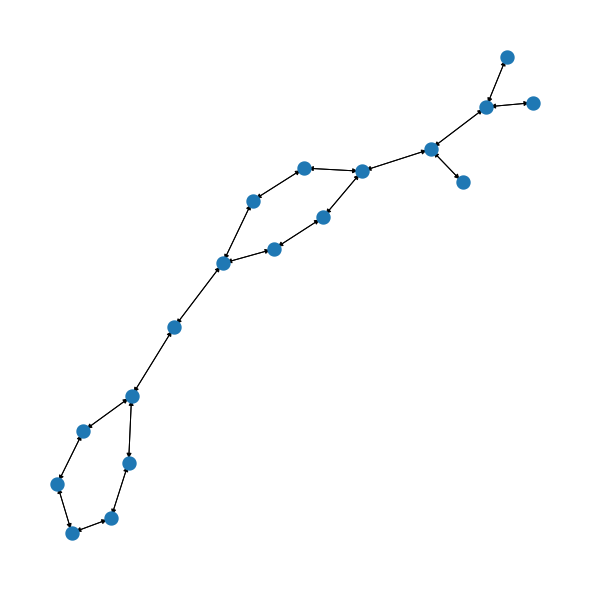

In [59]:
vis = to_networkx(graph)
plt.figure(1,figsize=(8,8)) 
nx.draw(vis, cmap=plt.get_cmap('Set3'),node_size=70,linewidths=6)
plt.show()

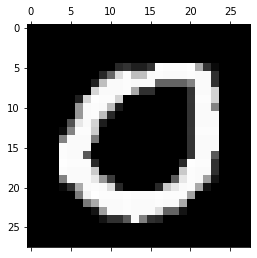

In [60]:
digit = x[5].reshape(28,28)
plt.matshow(digit, cmap='gray')

In [62]:
graph

Data(x=[18, 784], edge_index=[2, 38], y=[1])